# <font color='Blue'>Random Forest Classification .</font>

- Here, i will take in-built IRIS data set

- In this dataset, the goal is to classify iris flowers into one of three species based on their features (sepal length, sepal width, petal length, and petal width).

- In the Iris dataset, you predict the species of the iris (Setosa, Versicolor, or Virginica).

# <font color='Blue'>  </font>

### <font color='magenta'>Importing Libraries .</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import plot_tree
from sklearn.datasets import load_iris

In [2]:
import warnings

warnings.filterwarnings('ignore')

# <font color='Blue'>  </font>

### <font color='magenta'> Loading In-Built Data set (IRIS) .</font>

In [4]:
# Load the Iris dataset
iris = load_iris()

X = pd.DataFrame(data=iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

# <font color='Blue'>  </font>

### <font color='magenta'>EDA .</font>

- I just plot the normal graphs, Because in_built data set we don't have null values and we don't want changing numerical because it's all ready contain numerical values. 

In [5]:
# Show the first few rows of the dataset
print(X.head())
print(y.value_counts())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
0    50
1    50
2    50
Name: count, dtype: int64


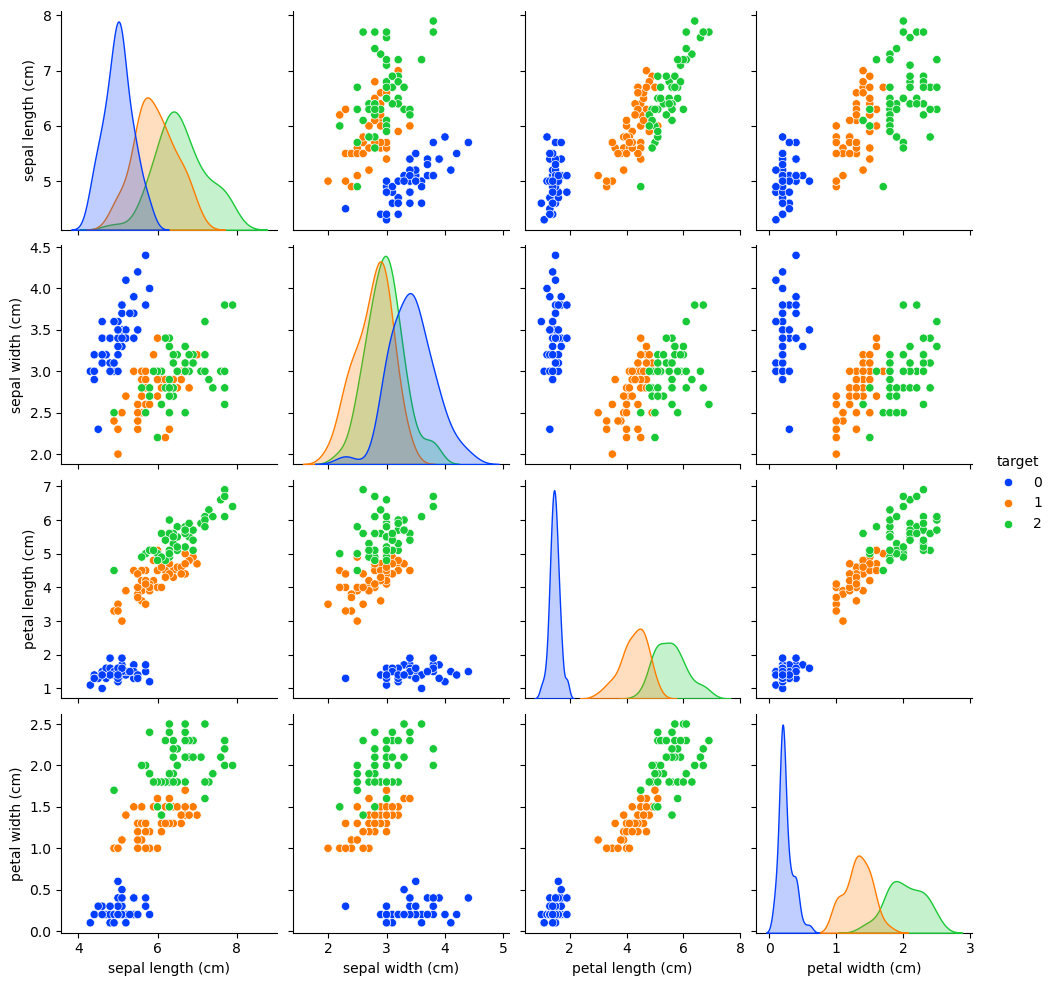

In [6]:
# Pairplot
sns.pairplot(pd.concat([X, y.rename('target')], axis=1), hue='target', palette='bright')
plt.show()

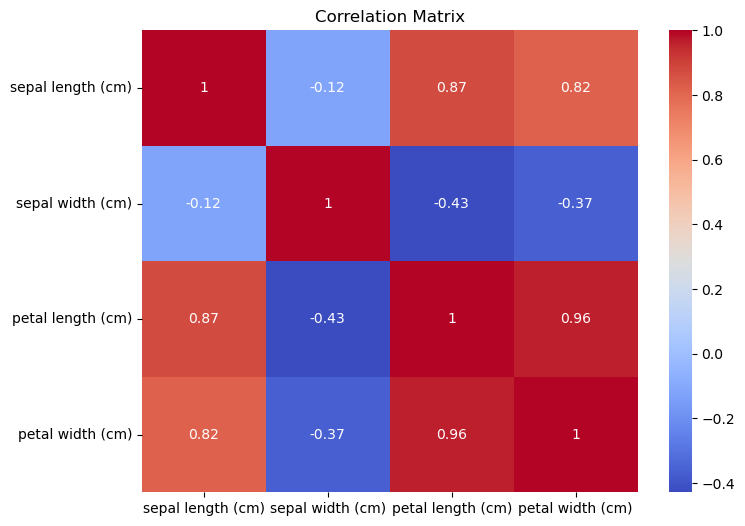

In [7]:
# Correlation Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# <font color='Blue'>  </font>

# <font color='Blue'>  </font>

### <font color='magenta'>Splitting The Train and Test</font>

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color='Blue'>  </font>

### <font color='magenta'>Build and Train Random Forest Model</font>

In [9]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# <font color='Blue'>  </font>

### <font color='magenta'>Making Predications</font>

In [10]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Show the predictions
print("Predicted classes:", y_pred)
print("Actual classes:", y_test.values)

Predicted classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]
Actual classes: [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# <font color='Blue'>  </font>

### <font color='magenta'>Model Evaluation </font>

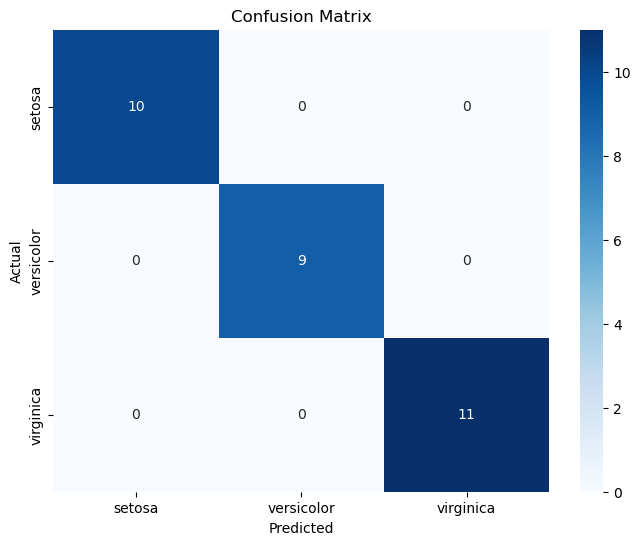

In [11]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))

In [13]:
# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Model Accuracy: {accuracy:.2f}')

Model Accuracy: 1.00


# <font color='Blue'>  </font>

### <font color='magenta'>Plotting Random Forest Tree .</font>

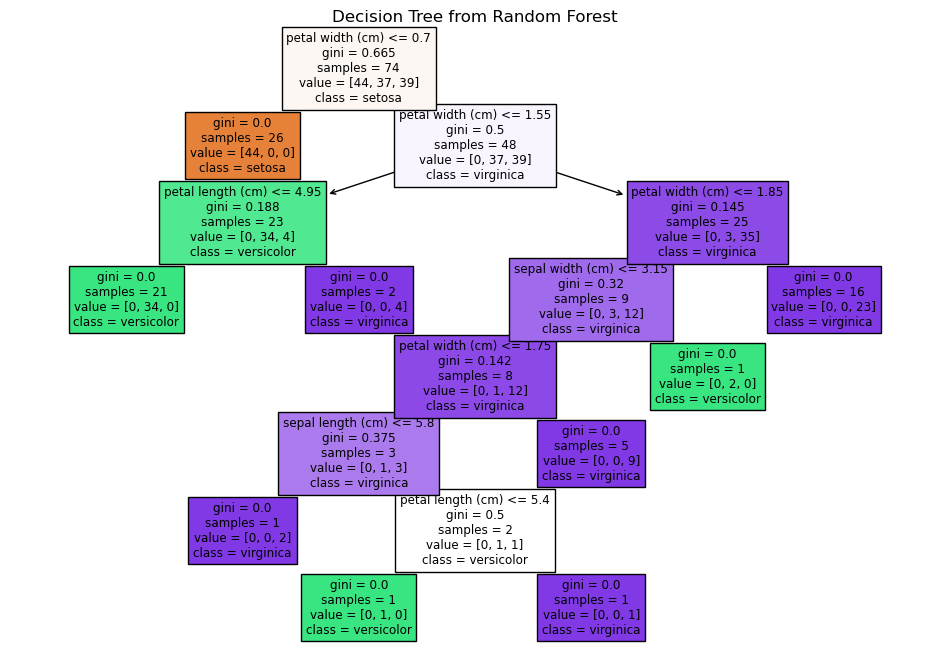

In [14]:
# Plot one of the trees in the forest
plt.figure(figsize=(12, 8))
plot_tree(rf_model.estimators_[0], feature_names=iris.feature_names, 
          class_names=iris.target_names, filled=True)
plt.title('Decision Tree from Random Forest')
plt.show()

# <font color='Blue'>  </font>

# <font color='Blue'>  </font>

### <font color='magenta'>Taking new input data and predicting which flower is this</font>

In [21]:
# New input values (sepal length, sepal width, petal length, petal width)
new_samples = pd.DataFrame({
    'sepal length (cm)': [5.0, 6.5, 4.7],
    'sepal width (cm)': [3.5, 3.0, 3.2],
    'petal length (cm)': [1.6, 5.5, 1.3],
    'petal width (cm)': [0.2, 2.0, 0.2]
})

In [22]:
# Make predictions for the new samples
new_predictions = rf_model.predict(new_samples)

# Show the predicted classes
predicted_classes = [iris.target_names[i] for i in new_predictions]
print("Predicted classes for new samples:", predicted_classes)

Predicted classes for new samples: ['setosa', 'virginica', 'setosa']


# <font color='Blue'>  </font>

# <font color='Blue'>  </font>

# <font color='red'>END  </font>